In [35]:
import pandas as pd
import numpy as np
import scipy

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
#глубокое обучение
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from matplotlib import pyplot

%matplotlib inline


In [36]:
#загрузка данных
path='https://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv'

In [37]:
df = pd.read_csv(path, header = None)
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [38]:
# смотрим что загрузилось
df.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [39]:
# коррелляция
df.corr()

,0,1,2,3,4
0,1.000000,0.264026,-0.380850,0.276817,-0.724843
1,0.264026,1.000000,-0.786895,-0.526321,-0.444688
2,-0.380850,-0.786895,1.000000,0.318841,0.155883
3,0.276817,-0.526321,0.318841,1.000000,-0.023424
4,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [40]:
# общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [41]:
# распределение значений
df[4].value_counts()

0    762
1    610
Name: 4, dtype: int64

In [42]:
#создание выборки X и y
X, y = df.values[:, : -1], df.values[:,  -1]


In [43]:
X = X.astype('float32')# приводим значение к float

In [44]:
X[1]

array([ 4.5459,  8.1674, -2.4586, -1.4621], dtype=float32)

In [45]:
y[1]

0.0

In [46]:
#LabelEncoder для y
y = LabelEncoder().fit_transform(y)

In [47]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True )

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 4)
(343, 4)
(1029,)
(343,)


In [49]:
#Нейронная сеть
n_features = X.shape[1] #размерность x

In [50]:
model = Sequential()

model.add(Dense(20, activation = 'relu', input_shape =(n_features,) ))
model.add(Dense(10, activation = 'relu'))
#выходной слой
model.add(Dense(1, activation = 'sigmoid'))
# компилируем модель
model.compile(optimizer ='adam', loss ='binary_crossentropy')
#обучение модели
history = model.fit(X_train, y_train,
                    epochs = 20,
                    batch_size = 32,
                    verbose = 1,
                    validation_data = (X_test, y_test))
#predict test_set 
yhat = model.predict_classes(X_test)

#валидируем наш прогноз
score = accuracy_score(y_test, yhat)

print('Accuracy:', score)

#визуализация процесса обучения
pyplot.title('Обучение')
pyplot.xlabel('epochs')
pyplot.ylabel('Cross_entropy')
pyplot.plot(history.history['loss'], label ='train')
pyplot.plot(history.history['val_loss'], label ='val')
pyplot.legend()
pyplot.show()

Epoch 1/20
33/33 [==============================] - 6s 31ms/step - loss: 0.5904 - val_loss: 0.3470
Epoch 2/20
33/33 [==============================] - 0s 12ms/step - loss: 0.2726 - val_loss: 0.2011
Epoch 3/20
33/33 [==============================] - 0s 13ms/step - loss: 0.1693 - val_loss: 0.1290
Epoch 4/20
33/33 [==============================] - 0s 13ms/step - loss: 0.1178 - val_loss: 0.0927
Epoch 5/20
33/33 [==============================] - 0s 12ms/step - loss: 0.0890 - val_loss: 0.0729
Epoch 6/20
33/33 [==============================] - 0s 13ms/step - loss: 0.0700 - val_loss: 0.0574
Epoch 7/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0566 - val_loss: 0.0470
Epoch 8/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0469 - val_loss: 0.0391
Epoch 9/20
33/33 [==============================] - 0s 13ms/step - loss: 0.0391 - val_loss: 0.0328
Epoch 10/20
33/33 [==============================] - 0s 13ms/step - loss: 0.0332 - val_loss: 0.0280
Epoch 11/

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
#cross_val
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(10)
score = [] #пустой список для метрик
for train_ix, test_ix in kfold.split(X,y):
  X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
  n_features = X.shape[1] #размерность x  
  model = Sequential()
  model.add(Dense(20, activation = 'relu', input_shape =(n_features,) ))
  model.add(Dense(10, activation = 'relu'))
  #выходной слой
  model.add(Dense(1, activation = 'sigmoid'))
  # компилируем модель
  model.compile(optimizer ='adam', loss ='binary_crossentropy')
  #обучение модели
  history = model.fit(X_train, y_train,
                      epochs = 20,
                      batch_size = 32,
                      verbose = 1,
                      validation_data = (X_test, y_test))


    
  #predict test_set 
  yhat = model.predict_classes(X_test)

  #валидируем наш прогноз
  score = accuracy_score(y_test, yhat)

  print('Accuracy:', score)

  #визуализация процесса обучения
  pyplot.title('Обучение')
  pyplot.xlabel('epochs')
  pyplot.ylabel('Cross_entropy')
  pyplot.plot(history.history['loss'], label ='train')
  pyplot.plot(history.history['val_loss'], label ='val')
  pyplot.legend()
  pyplot.show()

  scores.append(score)
    
ptrint('Средняя точност при Cross_val:',(np.mean(scores)))    
    

In [ ]:
#множественная классификация
import pandas as pd
import numpy as np
import scipy

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
#глубокое обучение
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import matplotlib.pyplot as plt
#from tensorflow.python.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
from PIL import Image
%matplotlib inline


In [ ]:
# подготовка данных для обучения 
# загружаем данные из датасета мнист
(x_train_org, y_train_org),(x_test_org, y_test_org) = mnist.load_data()

In [ ]:
# смотрим случайное изображение
plt.imshow(Image.fromarray(x_test_org[888]).convert('RGBA'))

In [51]:
# преобразование данных в вектор
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

In [52]:
# нормолизация данных
x_train = x_train.astype('float32')
x_train = x_train / 255

x_test = x_test.astype('float32')
x_test = x_test / 255

In [53]:
# OHE
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [54]:
print(y_test[888])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Epoch 1/30
120/120 [==============================] - 16s 108ms/step - loss: 0.4147 - accuracy: 0.8823 - val_loss: 0.1897 - val_accuracy: 0.9465
Epoch 2/30
120/120 [==============================] - 14s 114ms/step - loss: 0.1528 - accuracy: 0.9550 - val_loss: 0.1047 - val_accuracy: 0.9712
Epoch 3/30
120/120 [==============================] - 12s 101ms/step - loss: 0.0981 - accuracy: 0.9708 - val_loss: 0.0706 - val_accuracy: 0.9795
Epoch 4/30
120/120 [==============================] - 13s 105ms/step - loss: 0.0666 - accuracy: 0.9805 - val_loss: 0.0423 - val_accuracy: 0.9893
Epoch 5/30
120/120 [==============================] - 12s 104ms/step - loss: 0.0442 - accuracy: 0.9874 - val_loss: 0.0317 - val_accuracy: 0.9924
Epoch 6/30
120/120 [==============================] - 12s 101ms/step - loss: 0.0320 - accuracy: 0.9915 - val_loss: 0.0175 - val_accuracy: 0.9967
Epoch 7/30
120/120 [==============================] - 13s 105ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 0.0149 - val_ac

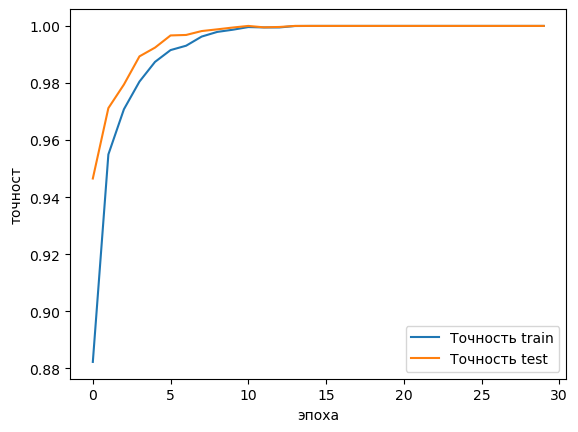

In [59]:
# нейронная сеть для множественной класификации
# модель НС
model = Sequential()

# входной полносвязный слой
model.add(Dense(400, input_dim = 784, activation = 'relu'))
model.add(Dropout (0,2))
model.add(Dense(200, activation = 'relu'))
model.add(Dropout (0,2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =["accuracy"])

n = 30000

history = model.fit(x_train[:n],
                    y_train[:n],
                    batch_size = 250,
                    epochs = 30,
                    validation_data = (x_train[:n], y_train[:n]),
                    verbose = 1)
plt.plot(history.history['accuracy'],
         label = 'Точность train')
plt.plot(history.history['val_accuracy'],
         label = 'Точность test')
plt.xlabel("эпоха")
plt.ylabel("точност")
plt.legend()
plt.show()

In [64]:
# сверточная нейронная сеть
import pandas as pd
import numpy as np
import scipy

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
#глубокое обучение
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import utils
import matplotlib.pyplot as plt
#from tensorflow.python.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
from PIL import Image
%matplotlib inline

In [65]:
# загружаем данные из датасета мнист
(x_train_org, y_train_org),(x_test_org, y_test_org) = mnist.load_data()


In [66]:
# OHE
y_train = utils.to_categorical(y_train_org, 10)
y_train[10]
# преобразование данных
x_train = x_train_org.reshape(x_train_org.shape[0],28, 28, 1)
x_test = x_test_org.reshape(x_test_org.shape[0],28, 28, 1)

Epoch 1/30
120/120 [==============================] - 62s 486ms/step - loss: 2.4206 - accuracy: 0.8400 - val_loss: 0.2469 - val_accuracy: 0.9320
Epoch 2/30
120/120 [==============================] - 59s 491ms/step - loss: 0.1990 - accuracy: 0.9466 - val_loss: 0.1172 - val_accuracy: 0.9648
Epoch 3/30
120/120 [==============================] - 63s 525ms/step - loss: 0.1087 - accuracy: 0.9683 - val_loss: 0.0722 - val_accuracy: 0.9773
Epoch 4/30
120/120 [==============================] - 62s 515ms/step - loss: 0.0666 - accuracy: 0.9799 - val_loss: 0.0488 - val_accuracy: 0.9846
Epoch 5/30
120/120 [==============================] - 58s 483ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0326 - val_accuracy: 0.9892
Epoch 6/30
120/120 [==============================] - 62s 516ms/step - loss: 0.0299 - accuracy: 0.9902 - val_loss: 0.0196 - val_accuracy: 0.9936
Epoch 7/30
120/120 [==============================] - 57s 480ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0188 - val_ac

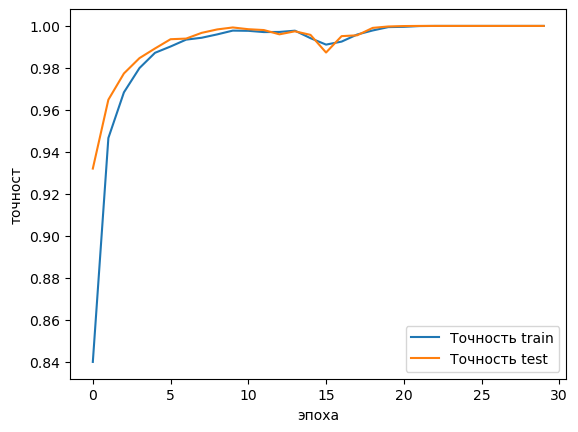

In [69]:
model = Sequential()

# входной полносвязный слой
model.add(Conv2D(32,(3,3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dropout (0,2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =["accuracy"])

n = 30000

history = model.fit(x_train[:n],
                    y_train[:n],
                    batch_size = 250,
                    epochs = 30,
                    validation_data = (x_train[:n], y_train[:n]),
                    verbose = 1)
plt.plot(history.history['accuracy'],
         label = 'Точность train')
plt.plot(history.history['val_accuracy'],
         label = 'Точность test')
plt.xlabel("эпоха")
plt.ylabel("точност")
plt.legend()
plt.show()